In [1]:
import rasterio
from shapely.geometry import mapping
from rasterio import mask as msk 
from matplotlib import cm
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap, ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon

In [2]:
tif_file = rasterio.open('../Data/GHS_POP_E2015_GLOBE_R2019A_54009_1K_V1_0/GHS_POP_E2015_GLOBE_R2019A_54009_1K_V1_0.tif')
ghs_data = tif_file.read()

In [3]:
print("Tiff Boundary", tif_file.bounds)
print("Tiff CRS", tif_file.crs)
print("Data shape", ghs_data.shape)
print("Max value", np.amax(ghs_data))
print("Min value", np.amin(ghs_data))

Tiff Boundary BoundingBox(left=-18041000.0, bottom=-9000000.0, right=18041000.0, top=9000000.0)
Tiff CRS ESRI:54009
Data shape (1, 18000, 36082)
Max value 442590.9375
Min value -200.0


In [4]:
ghs_data[0][ghs_data[0] < 0.0] = 0.0

In [5]:
ourcmap = cm.get_cmap('hot_r', 460)
newcolors = ourcmap(np.linspace(0, 1, 460))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp = ListedColormap(newcolors)

In [7]:
# fig, ax = plt.subplots(facecolor='#FCF6F5FF')
# fig.set_size_inches(14, 7)
# ax.imshow(ghs_data[0], norm=colors.LogNorm(), cmap=newcmp)
# ax.axis('off')
# plt.savefig("../Data/Outputs/MSR_raw1.png", dpi=1000, bbox_inches='tight')
# plt.show()

In [6]:
our_cmap = cm.get_cmap('hot_r', 10)
newcolors = our_cmap(np.linspace(0, 1, 10))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = np.vstack((background_colour, newcolors))
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 1, 5, 10, 20, 50, 100, 200, 1000, 2000, 10000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

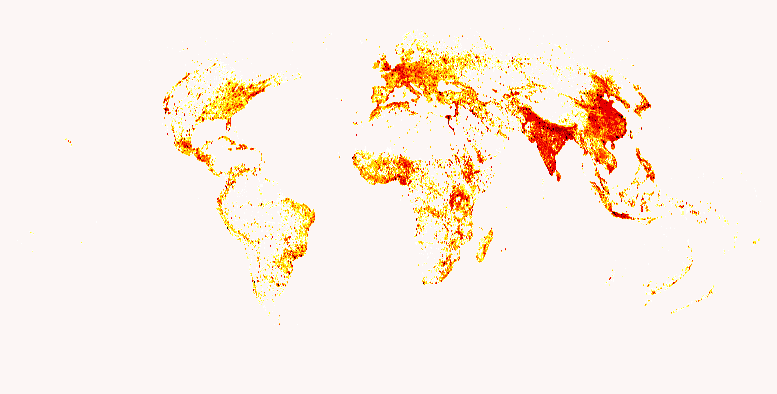

In [7]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=norm, cmap=our_cmap)
ax.axis('off')
#plt.savefig("../Data/Outputs/MSR_raw2.png", dpi=1000, bbox_inches='tight')
plt.show()

In [15]:
df = gpd.read_file('../Data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
#df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
#western_europe = df.loc[df['ADMIN'].isin(['United Kingdom', 'Germany', 'Austria', 'Czechia',
#                                              'Italy', 'Denmark', 'Luxembourg',
#                                              'Belgium', 'Switzerland', 'Ireland'])]
france = df.loc[df['ADMIN'] == 'France']
#print(france)
Polygons = list(france.iloc[0].geometry.geoms)
france.geometry.geoms = [Polygons[1]]

# spain = df.loc[df['ADMIN'] == 'Spain']
# Polygons = list(spain.iloc[0].geometry)
# spain.geometry = [Polygons[2]]

# netherlands = df.loc[df['ADMIN'] == 'Netherlands']
# Polygons = list(netherlands.iloc[0].geometry)
# netherlands.geometry = [Polygons[0]]


# portugal = df.loc[df['ADMIN'] == 'Portugal']
# Polygons = list(portugal.iloc[0].geometry)
# portugal.geometry = [Polygons[0]]

#western_europe = pd.concat([western_europe, france, spain, netherlands, portugal])

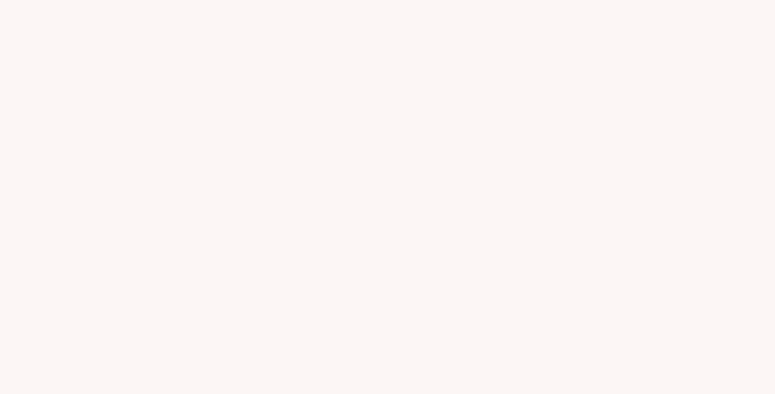

In [15]:
europe_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in western_europe.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(europe_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
plt.savefig("../Data/Outputs/MSR_raw3.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.8, 0.8, 0.08, 0.08], anchor='NE')
newax.axis('off')
txt = ax.text(0.0, 0.0, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')


plt.savefig("Outputs/MSR_raw2.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd

df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
western_europe = df.loc[df['ADMIN'].isin(['United Kingdom', 'Germany', 'Austria', 'Czechia',
                                              'Italy', 'Denmark', 'Luxembourg',
                                              'Belgium', 'Switzerland', 'Ireland'])]
france = df.loc[df['ADMIN'] == 'France']
Polygons = list(france.iloc[0].geometry)
france.geometry = [Polygons[1]]

spain = df.loc[df['ADMIN'] == 'Spain']
Polygons = list(spain.iloc[0].geometry)
spain.geometry = [Polygons[2]]

netherlands = df.loc[df['ADMIN'] == 'Netherlands']
Polygons = list(netherlands.iloc[0].geometry)
netherlands.geometry = [Polygons[0]]


portugal = df.loc[df['ADMIN'] == 'Portugal']
Polygons = list(portugal.iloc[0].geometry)
portugal.geometry = [Polygons[0]]

western_europe = pd.concat([western_europe, france, spain, netherlands, portugal])

In [ ]:
from shapely.geometry import mapping
from rasterio import mask as msk 

europe_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in western_europe.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(europe_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
txt = ax.text(0.0, 0.0, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')

#plt.savefig("outputs/raw3.png", dpi=600, bbox_inches='tight')
plt.show()

In [30]:
usa = df.loc[df['ADMIN'] == 'United States of America']
Polygons = list(usa.iloc[0].geometry.geoms)
usa.geometry.geoms = [Polygons[0]]

In [39]:
usa_coordinates = []
for geom in usa.geometry.geoms:
    usa_coordinates.append(mapping(geom))
#print(usa_coordinates)
usa_array, clipped_transform = msk.mask(tif_file, usa_coordinates, crop=True)
print(usa_array)
# fig, ax = plt.subplots(facecolor='#FCF6F5FF')
# fig.set_size_inches(14, 7)
# ax.imshow(usa_array[0], norm=norm, cmap=our_cmap)
# ax.axis('off')
# newax = fig.add_axes([0.8, 0.8, 0.08, 0.08], anchor='NE')
# newax.axis('off')
# # txt = ax.text(0.0, 0.0, "Population Density \n@PythonMaps",
# #               size=8,
# #               color='black',
# #               transform = ax.transAxes,
# #               fontfamily='fantasy')
# #plt.savefig("outputs/raw4.png", dpi=600, bbox_inches='tight')
# plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [33]:

    print(mapping(geom))


{'type': 'Polygon', 'coordinates': (((-122.75301682799991, 48.992514547000084), (-122.65325801699994, 48.992514547000084), (-122.4333747969999, 48.992514547000084), (-122.21351741599996, 48.992514547000084), (-121.99376338799995, 48.992514547000084), (-121.77395768299994, 48.992514547000084), (-121.55415197799991, 48.992514547000084), (-121.33432043499988, 48.992514547000084), (-121.11451472999995, 48.992514547000084), (-120.89470902599993, 48.992514547000084), (-120.67495499799993, 48.992514547000084), (-120.4551492929999, 48.992514547000084), (-120.23531774999988, 48.992514547000084), (-120.01551204499995, 48.992514547000084), (-119.79570633999992, 48.992514547000084), (-119.5758747969999, 48.992514547000084), (-119.35604325399987, 48.992514547000084), (-119.13621171099994, 48.992514547000084), (-118.91648352099993, 48.992514547000084), (-118.69667781599992, 48.992514547000084), (-118.4768721119999, 48.992514547000084), (-118.25706640699988, 48.992514547000084), (-118.03723486399994,

In [ ]:
china = df.loc[df['ADMIN'] == 'China']

china_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in china.geometry.tolist()], crop=True, nodata=0)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(china_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.75, 0.8, 0.08, 0.08], anchor='NE')
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
egypt = df.loc[df['ADMIN'] == 'Egypt']

egypt_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in egypt.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(egypt_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw6.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
india = df.loc[df['ADMIN'] == 'India']

india_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in india.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(india_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw7.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
brazil = df.loc[df['ADMIN'] == 'Brazil']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw8.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
brazil = df.loc[df['ADMIN'] == 'Mexico']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw9.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
brazil = df.loc[df['ADMIN'] == 'Bangladesh']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw8.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
brazil = df.loc[df['ADMIN'] == 'Pakistan']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw8.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
from shapely.geometry import mapping
from rasterio import mask as msk 


brazil = df.loc[df['ADMIN'] == 'Japan']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw9.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
=

In [ ]:
X, Y = np.meshgrid(np.arange(egypt_array.shape[2]), np.arange(egypt_array.shape[1]))


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, egypt_array[0], rstride=1, cstride=1, cmap=plt.cm.hot)
ax.view_init(elev=50., azim=90)
ax.axis('off')
plt.savefig("outputs/raw3.png", dpi=600, bbox_inches='tight')
plt.show()
